In [2]:
#require "juplot"

In [3]:
open Owl
open Gp

In [4]:
let _ =
  let open Gp in
  let figure (module P : Plot) =
    P.multiplot
      ~rect:((0.2, 0.2), (0.8, 0.8))
      ~spacing:(0.05, 0.2)
      (2, 3)
      (fun ~margins _ i j ->
        let x = Mat.linspace 0. Const.pi2 100 in
        let y = Mat.(cos (Float.of_int j $+ x *$ Float.of_int Int.(i + 1))) in
        P.plot
          (L [ x; y ])
          (default_props @ [ yrange (-1., 1.); ytics (`regular [ 0.; 1. ]); margins ]))
  in
  Juplot.draw ~fmt:`svg figure

error: compile_error

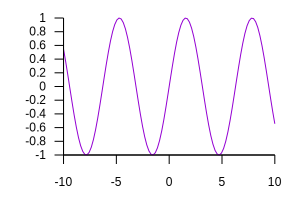

- : unit = ()


In [5]:
(* animation example *)
let _ =
  let open Gp in
  let display_id = Jupyter_notebook.display "text/html" "" in
  let plot phase (module P : Plot) = P.ex Printf.(sprintf "plot sin(x+%f)" phase) in
  Mat.linspace 0. Const.pi2 100
  |> Mat.iter (fun phase ->
         Juplot.draw ~fmt:`svg ~size:(300, 200) ~display_id (plot phase);
         Unix.sleepf 0.01)

val figure : (module Gp.Plot) -> unit = <fun>


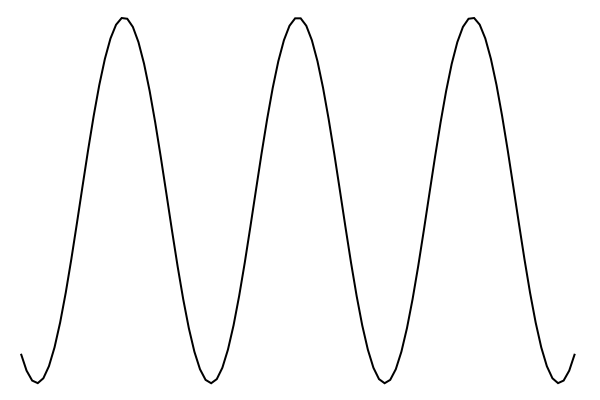

In [8]:
let figure (module P: Plot) =
  P.plot (S "cos(x)") ~style:"l lc 8 lw 2" [ barebone ]
  
let () = Juplot.draw ~fmt:`svg  figure
